### 01: 간단한 분류 예측 모델 만들기(의사결정트리)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# train-test split

split_count=int(df.shape[0]*0.8)
split_count

614

In [5]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [6]:
print(train.shape,test.shape)

(614, 9) (154, 9)


In [7]:
feature_names=train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
label_name=train.columns[-1]
label_name

'Outcome'

In [9]:
train[feature_names]
# -> outcome column이 빠짐

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
609            1      111             62             13      182  24.0   
610            3      106             54             21      158  30.9   
611            3      174             58             22      194  32.9   
612            7      168             88             42      321  38.2   
613            6      105             80             28        0  32.5   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
609                     0.138   23  
610                     0.292   24  
611                     0.593   36  
612                     0.787   40  
613                     0.878   26  

[614 rows x 8 columns]

In [10]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [11]:
train[label_name]

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [12]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

In [14]:
y_test=test[label_name]
print(y_test.shape)

(154,)


# -----

In [15]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [16]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=model.predict(x_test)

In [18]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [19]:
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [20]:
# 정확도구하기 1
(y_pred==y_test).mean()

0.7597402597402597

# -----

[Text(191.25032971864007, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(63.59679073856975, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.559906213364595, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.279953106682298, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.139976553341149, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.419929660023445, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.279953106682298, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.559906213364595, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(18.83985932004689, 172.6729411764706, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(15.6998827

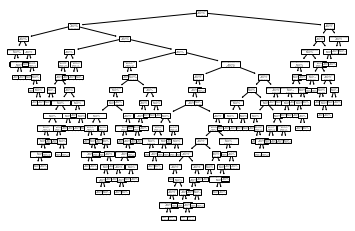

In [21]:
# decision tree 시각화

from sklearn.tree import plot_tree

plot_tree(model,feature_names=feature_names)

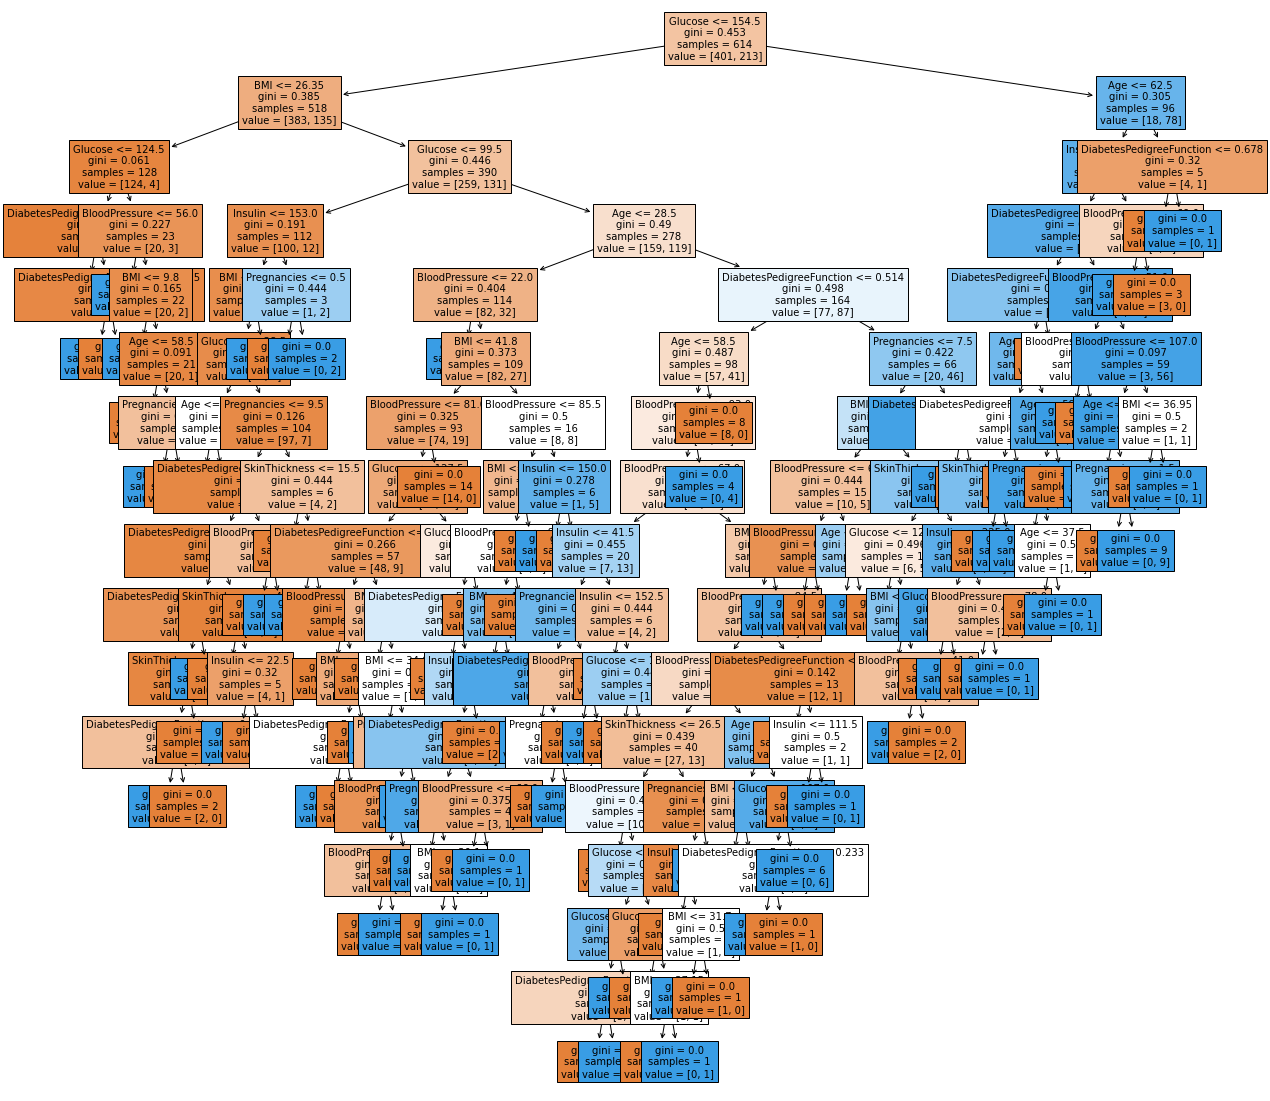

In [22]:
plt.figure(figsize=(20,20))

tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [23]:
# 정확도 구하기 2
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7597402597402597

In [24]:
# 정확도 구하기 3
model.score(x_test,y_test)

0.7597402597402597

# -------------------------------------------------

### 02:수치형 변수를 범주형 변수로 만들기

In [25]:
# 임신횟수를 범주형 변수로 변환하기

In [26]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [27]:
df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

In [28]:
# train-test split

split_count=int(df.shape[0]*0.8)
split_count

614

In [29]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [30]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [31]:
label_name='Outcome'
label_name

'Outcome'

In [32]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Pregnancies_high  
0                     0.627   50             False  
1                     0.351   31             False  
2                     0.672   32              True  
3                     0.167   21             False  
4                     2.288   33             False

In [33]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614      138             74             26      144  36.1   
615      106             72              0        0  25.8   
616      117             96              0        0  28.7   
617       68             62             13       15  20.1   
618      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  Pregnancies_high  
614                     0.557   50              True  
615                     0.207   27             False  
616                     0.157   30             False  
617                     0.257   23             False  
618                     1.282   50              True

In [35]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [36]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=model.predict(x_test)

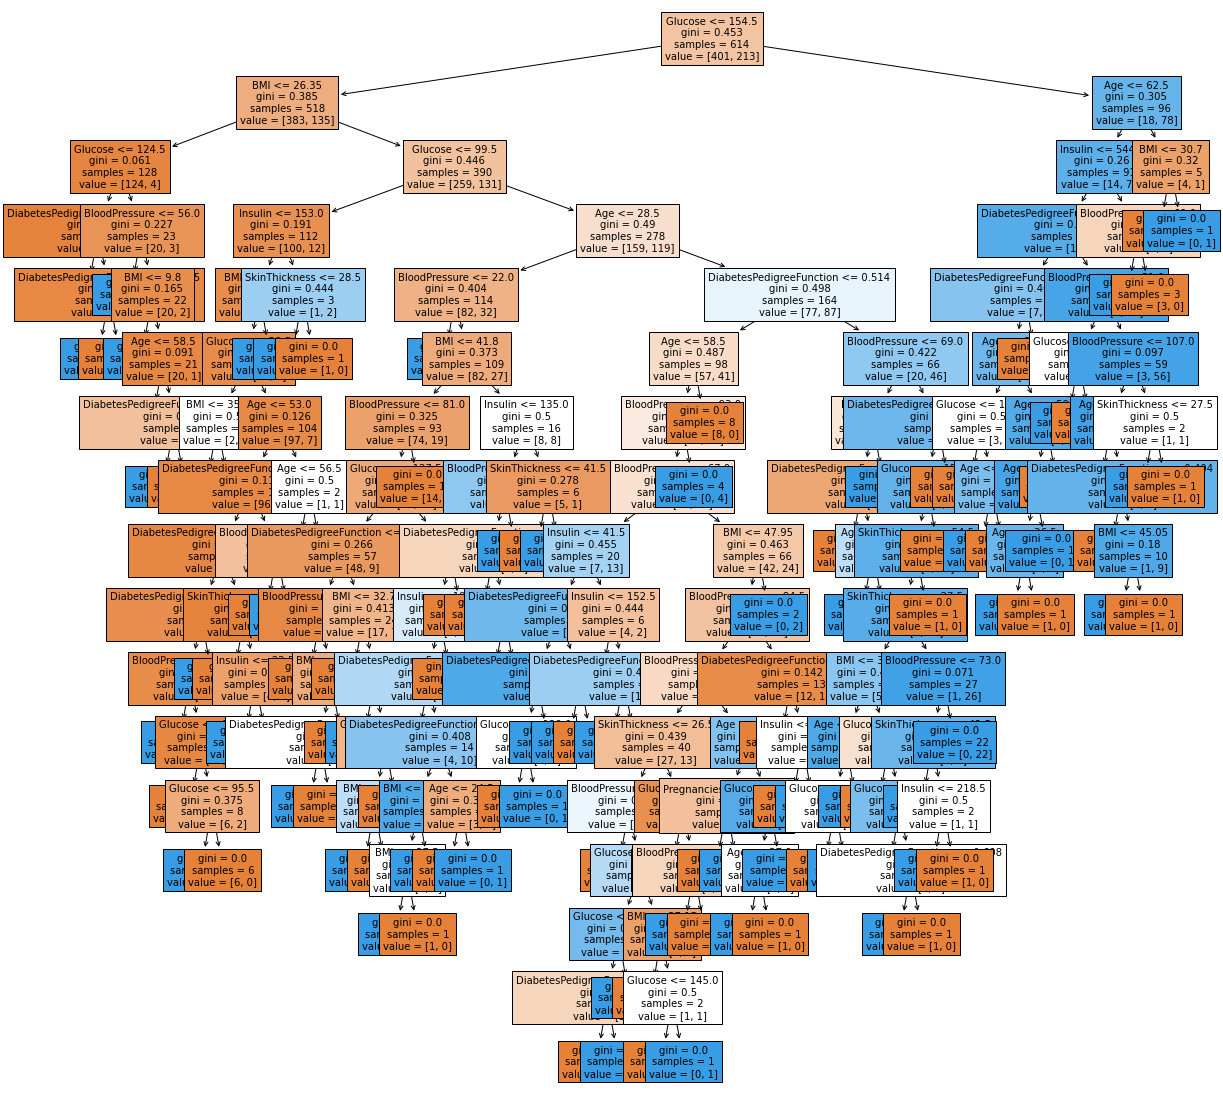

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [40]:
(y_pred==y_test).mean()
# -> 정확도 상승

0.7597402597402597

# -----

In [41]:
# 나이를 범주형 변수로 변환하기 - one hot encoding 표현

In [42]:
df['Age_low']=df['Age']<25
df[['Age','Age_low']].head()

Age  Age_low
0   50    False
1   31    False
2   32    False
3   21     True
4   33    False

In [43]:
df['Age_middle']=(df['Age']>=25) & (df['Age']<=60)
df[['Age','Age_low','Age_middle']].head()

Age  Age_low  Age_middle
0   50    False        True
1   31    False        True
2   32    False        True
3   21     True       False
4   33    False        True

In [44]:
df['Age_high']=df['Age']>60
df[['Age','Age_low','Age_middle','Age_high']].head()

Age  Age_low  Age_middle  Age_high
0   50    False        True     False
1   31    False        True     False
2   32    False        True     False
3   21     True       False     False
4   33    False        True     False

<AxesSubplot:xlabel='Age_low', ylabel='count'>

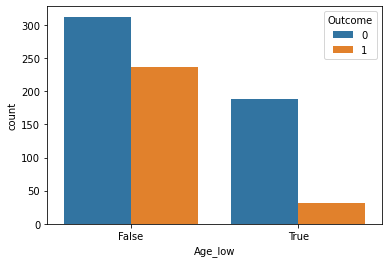

In [45]:
sns.countplot(data=df,x='Age_low',hue='Outcome')

In [46]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [47]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [48]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high']

In [49]:
label_name='Outcome'
label_name

'Outcome'

In [50]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 10)


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Pregnancies_high  Age_low  Age_middle  Age_high  
0                     0.627             False    False        True     False  
1                     0.351             False    False        True     False  
2                     0.672              True    False        True     False  
3                     0.167             False     True       False     False  
4                     2.288             False    False        True     False

In [51]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [52]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 10)


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614      138             74             26      144  36.1   
615      106             72              0        0  25.8   
616      117             96              0        0  28.7   
617       68             62             13       15  20.1   
618      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Pregnancies_high  Age_low  Age_middle  Age_high  
614                     0.557              True    False        True     False  
615                     0.207             False    False        True     False  
616                     0.157             False    False        True     False  
617                     0.257             False     True       False     False  
618                     1.282              True    False        True     False

In [53]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [54]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [55]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred=model.predict(x_test)

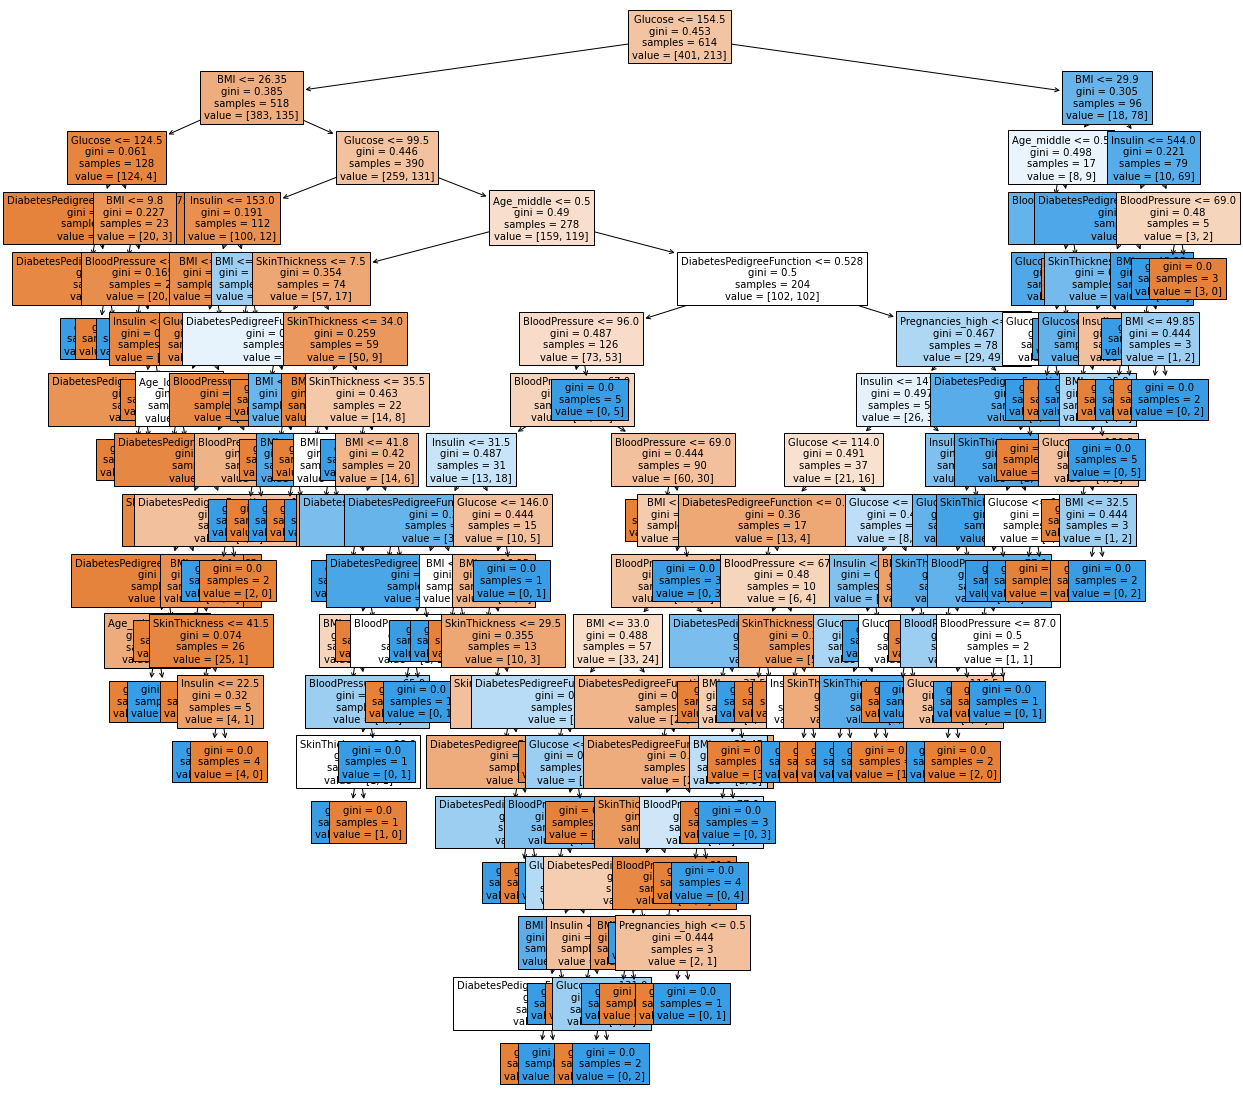

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [58]:
(y_pred==y_test).mean()
# -> 정확도 하락 : 어떤 수치를 기준으로 범주형변수로 만드느냐에 따라서도 성능이 달라질 수 있음

0.6883116883116883

# ------

In [59]:
# 결측치 다루기

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [60]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [61]:
df['Insulin_nan']=df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']].head()

Insulin  Insulin_nan
0        0          NaN
1        0          NaN
2        0          NaN
3       94         94.0
4      168        168.0

In [62]:
df['Insulin_nan'].isnull().sum()

374

In [63]:
df['Insulin_nan'].isnull().mean()
# -> 48%나 비어있음

0.4869791666666667

In [64]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].mean()

C:\Users\sohyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Insulin  Insulin_nan
Outcome                         
0         68.792000   130.287879
1        100.335821   206.846154

In [65]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].describe()

C:\Users\sohyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [66]:
# 결측치 채우기(평균값으로 대체)
df.loc[(df['Outcome']==1) & (df['Insulin_nan'].isnull()),'Insulin_nan']=206
df.loc[(df['Outcome']==0) & (df['Insulin_nan'].isnull()),'Insulin_nan']=130

In [67]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [68]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [69]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan']

In [70]:
label_name='Outcome'
label_name

'Outcome'

In [71]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  Age  \
0      148             72             35  33.6                     0.627   50   
1       85             66             29  26.6                     0.351   31   
2      183             64              0  23.3                     0.672   32   
3       89             66             23  28.1                     0.167   21   
4      137             40             35  43.1                     2.288   33   

   Pregnancies_high  Insulin_nan  
0             False        206.0  
1             False        130.0  
2              True        206.0  
3             False         94.0  
4             False        168.0

In [72]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [73]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614      138             74             26  36.1                     0.557   
615      106             72              0  25.8                     0.207   
616      117             96              0  28.7                     0.157   
617       68             62             13  20.1                     0.257   
618      112             82             24  28.2                     1.282   

     Age  Pregnancies_high  Insulin_nan  
614   50              True        144.0  
615   27             False        130.0  
616   30             False        130.0  
617   23             False         15.0  
618   50              True        206.0

In [74]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [75]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [76]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred=model.predict(x_test)

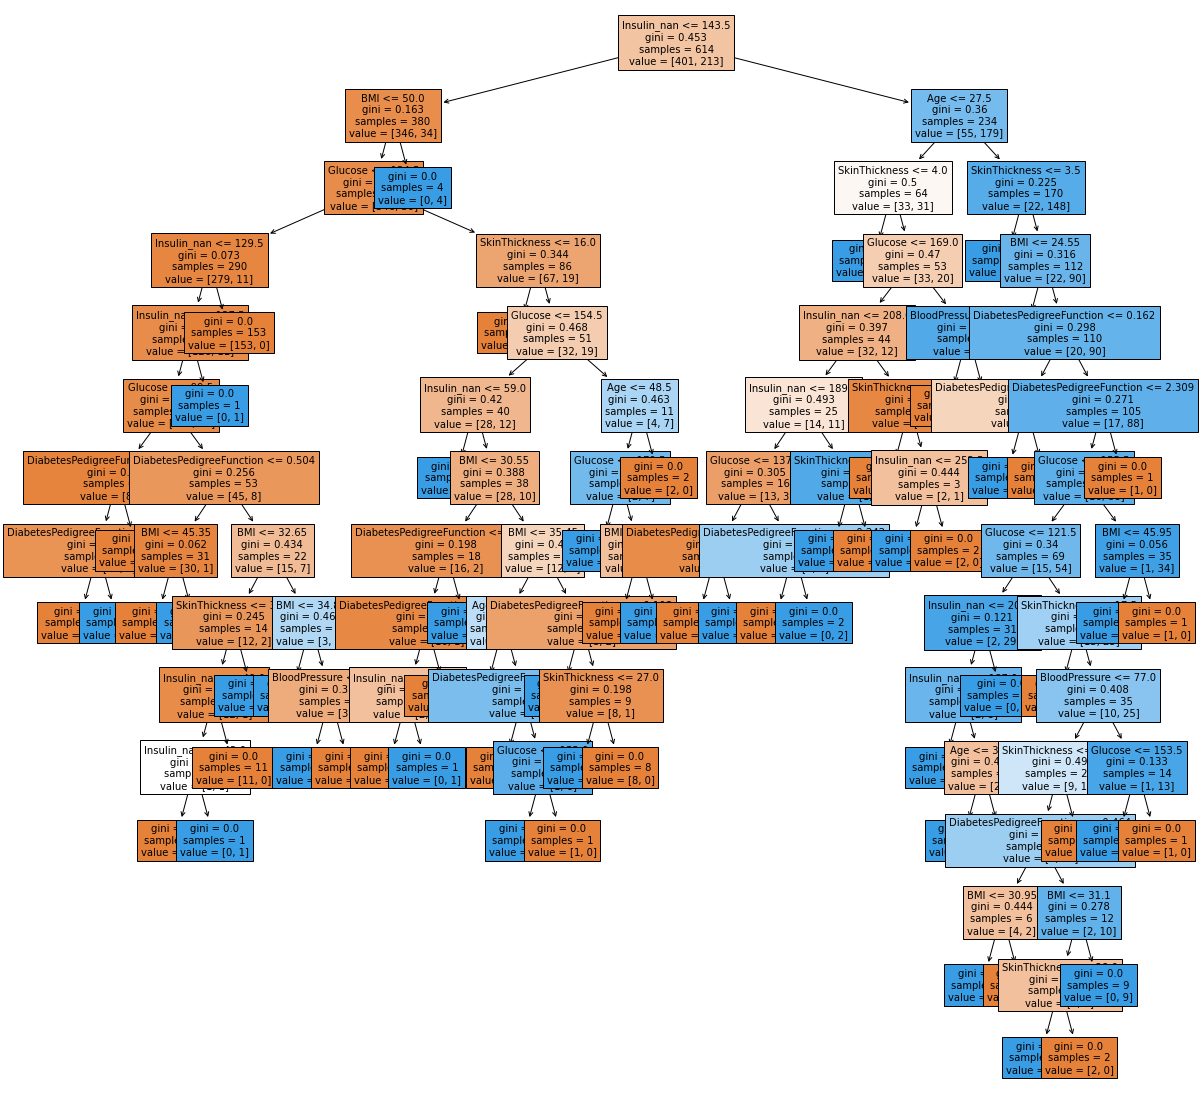

In [78]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)
# -> root에 Glucose대신 Insulin이 옴

In [79]:
(y_pred==y_test).mean()
# ->정확도가 다시 오름

0.8441558441558441

# -----

In [80]:
# 중앙값으로 결측치 대체

df['Insulin_nan']=df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']].head()

Insulin  Insulin_nan
0        0          NaN
1        0          NaN
2        0          NaN
3       94         94.0
4      168        168.0

In [81]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].median()

C:\Users\sohyeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Insulin  Insulin_nan
Outcome                      
0             39        102.5
1              0        169.5

In [82]:
df.loc[(df['Outcome']==1) & (df['Insulin_nan'].isnull()),'Insulin_nan']=102.5
df.loc[(df['Outcome']==0) & (df['Insulin_nan'].isnull()),'Insulin_nan']=169.5

In [83]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [84]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [85]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan']

In [86]:
label_name='Outcome'
label_name

'Outcome'

In [87]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  Age  \
0      148             72             35  33.6                     0.627   50   
1       85             66             29  26.6                     0.351   31   
2      183             64              0  23.3                     0.672   32   
3       89             66             23  28.1                     0.167   21   
4      137             40             35  43.1                     2.288   33   

   Pregnancies_high  Insulin_nan  
0             False        102.5  
1             False        169.5  
2              True        102.5  
3             False         94.0  
4             False        168.0

In [88]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [89]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614      138             74             26  36.1                     0.557   
615      106             72              0  25.8                     0.207   
616      117             96              0  28.7                     0.157   
617       68             62             13  20.1                     0.257   
618      112             82             24  28.2                     1.282   

     Age  Pregnancies_high  Insulin_nan  
614   50              True        144.0  
615   27             False        169.5  
616   30             False        169.5  
617   23             False         15.0  
618   50              True        102.5

In [90]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [91]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [92]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred=model.predict(x_test)

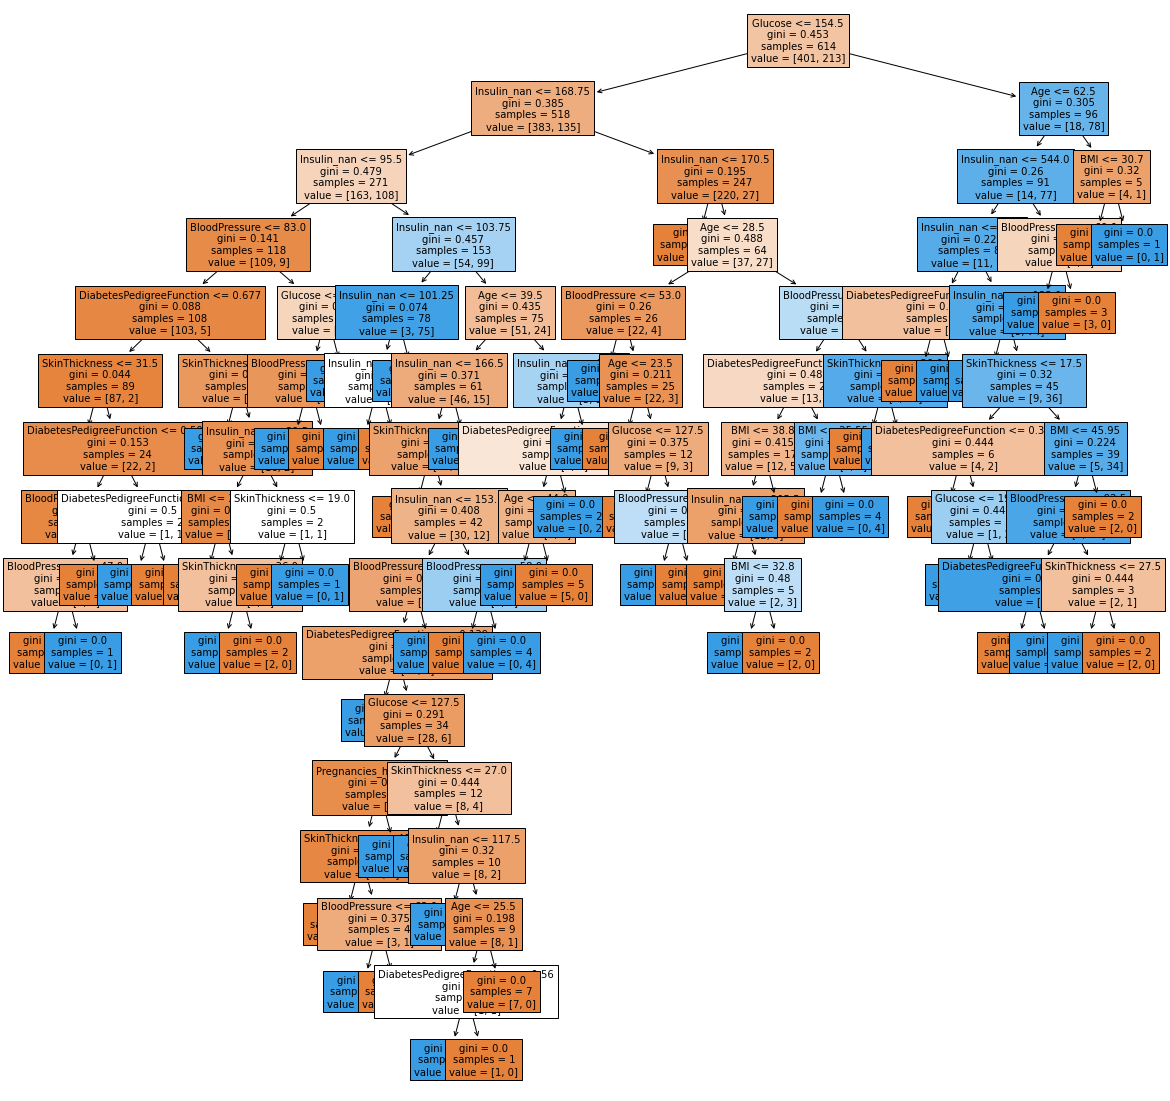

In [94]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)
# -> root에 Glucose대신 Insulin이 옴

In [95]:
(y_pred==y_test).mean()
# ->정확도가 더 오름
# 결측치를 평균으로 채우는 것보다 중앙값으로 채우는게 더욱 좋은 성능

0.935064935064935

# -----

### 왜도와 첨도
왜도: 한쪽으로 치우쳐진 정도
첨도: 뾰족한 정도

<AxesSubplot:xlabel='Insulin'>

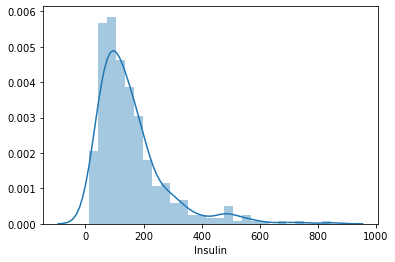

In [96]:
sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

<AxesSubplot:xlabel='Insulin'>

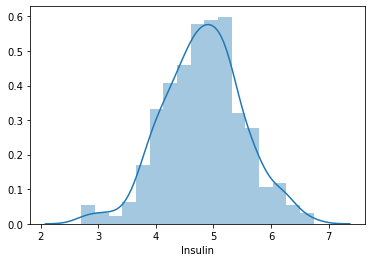

In [97]:
# -> 원래 데이터에 로그를 씌워 정규분포 형태를 만듦
# 데이터가 한쪽으로 치우칠때보다 정규분포 형태를 이룰때 더 성능이 좋음
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))

<AxesSubplot:xlabel='Insulin_nan'>

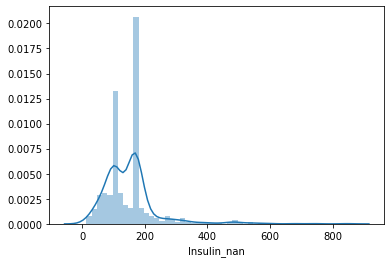

In [98]:
sns.distplot(df['Insulin_nan'])

<AxesSubplot:xlabel='Insulin_log'>

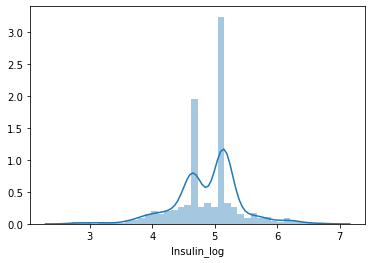

In [99]:
df['Insulin_log']=np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

In [100]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [101]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [102]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log']

In [103]:
label_name='Outcome'
label_name

'Outcome'

In [104]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(614, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  Age  \
0      148             72             35  33.6                     0.627   50   
1       85             66             29  26.6                     0.351   31   
2      183             64              0  23.3                     0.672   32   
3       89             66             23  28.1                     0.167   21   
4      137             40             35  43.1                     2.288   33   

   Pregnancies_high  Insulin_log  
0             False     4.639572  
1             False     5.138735  
2              True     4.639572  
3             False     4.553877  
4             False     5.129899

In [105]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [106]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614      138             74             26  36.1                     0.557   
615      106             72              0  25.8                     0.207   
616      117             96              0  28.7                     0.157   
617       68             62             13  20.1                     0.257   
618      112             82             24  28.2                     1.282   

     Age  Pregnancies_high  Insulin_log  
614   50              True     4.976734  
615   27             False     5.138735  
616   30             False     5.138735  
617   23             False     2.772589  
618   50              True     4.639572

In [107]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [108]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [109]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
y_pred=model.predict(x_test)

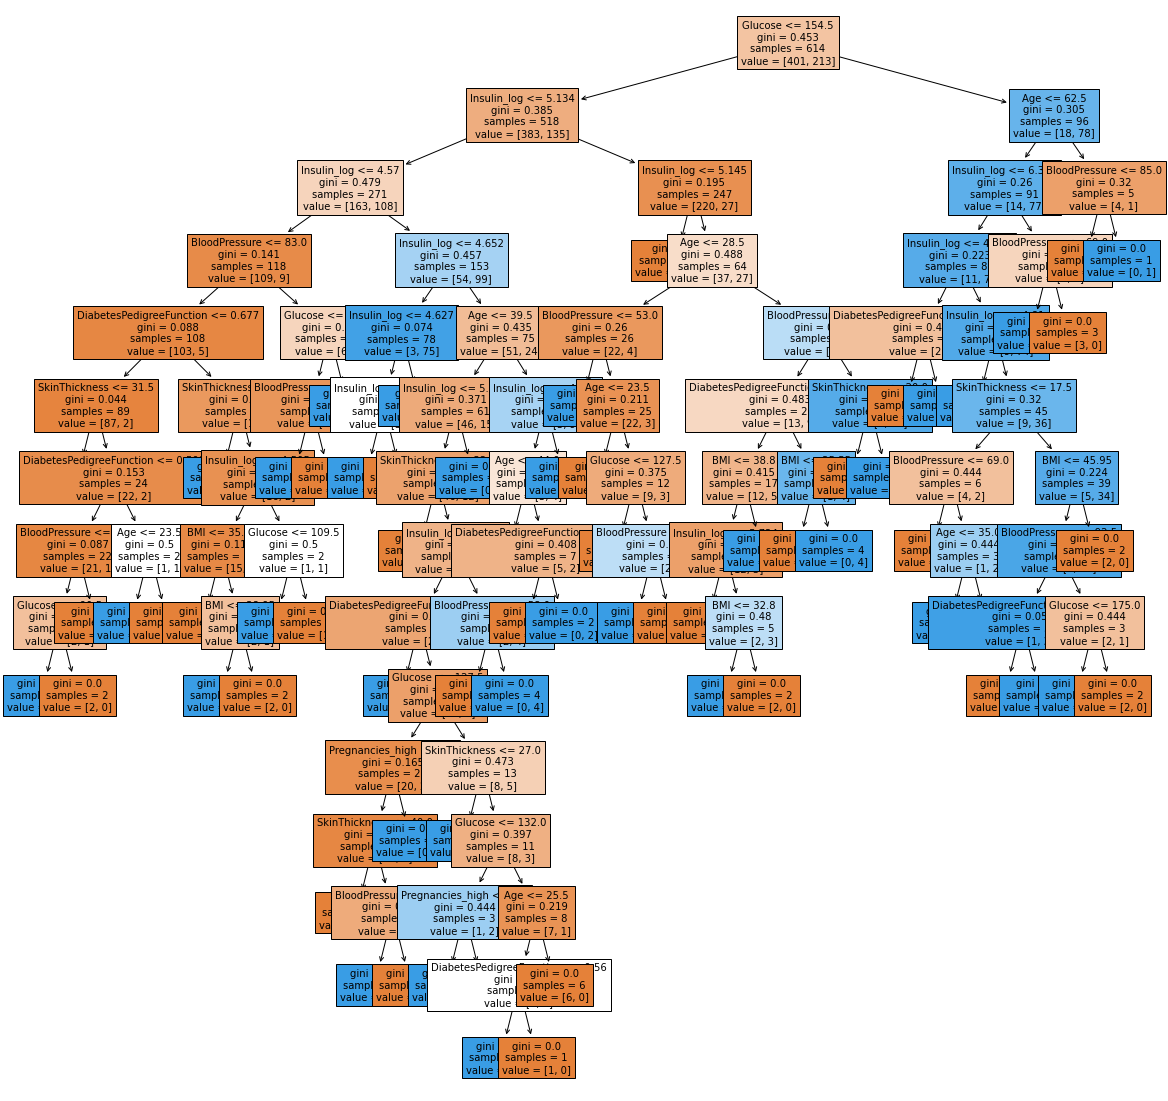

In [111]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [112]:
(y_pred==y_test).mean()

# ------강의자는 89%로 성능변화 X---------
# -> 정확도가 기존 Insulin사용했을때와 큰 변화가 없음
# 원래는 log를 취하면 대부분 성능이 더 좋아지만 여기서는 변화 X

0.948051948051948

# -----

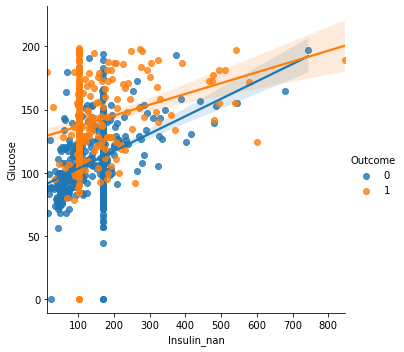

In [113]:
# 상관분석을 통해 파생변수 만들기 -> pima-diabetes-eda의 pairplot,heatmap참고

sns.lmplot(data=df,x='Insulin_nan',y='Glucose',hue='Outcome')

In [114]:
df['low_glu_Insulin']=(df['Glucose']<100) & (df['Insulin_nan']<=102.5)
df['low_glu_Insulin'].head()

0    False
1    False
2    False
3     True
4    False
Name: low_glu_Insulin, dtype: bool

In [115]:
pd.crosstab(df['Outcome'],df['low_glu_Insulin'])
# -> low_glu_insulin인 사람의 당뇨 발병율이 매우 낮다(5)

low_glu_Insulin  False  True 
Outcome                      
0                  418     82
1                  255     13

In [116]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [117]:
train=df[:split_count].copy()
test=df[split_count:].copy()

In [146]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log',
 'low_glu_Insulin']

In [147]:
label_name='Outcome'
label_name

'Outcome'

In [148]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(610, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  Age  \
0      148             72             35  33.6                     0.627   50   
1       85             66             29  26.6                     0.351   31   
2      183             64              0  23.3                     0.672   32   
3       89             66             23  28.1                     0.167   21   
4      137             40             35  43.1                     2.288   33   

   Pregnancies_high  Insulin_log  low_glu_Insulin  
0             False     4.639572            False  
1             False     5.138735            False  
2              True     4.639572            False  
3             False     4.553877             True  
4             False     5.129899            False

In [149]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [150]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614      138             74             26  36.1                     0.557   
615      106             72              0  25.8                     0.207   
616      117             96              0  28.7                     0.157   
617       68             62             13  20.1                     0.257   
618      112             82             24  28.2                     1.282   

     Age  Pregnancies_high  Insulin_log  low_glu_Insulin  
614   50              True     4.976734            False  
615   27             False     5.138735            False  
616   30             False     5.138735            False  
617   23             False     2.772589             True  
618   50              True     4.639572            False

In [151]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [152]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [153]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [154]:
y_pred=model.predict(x_test)

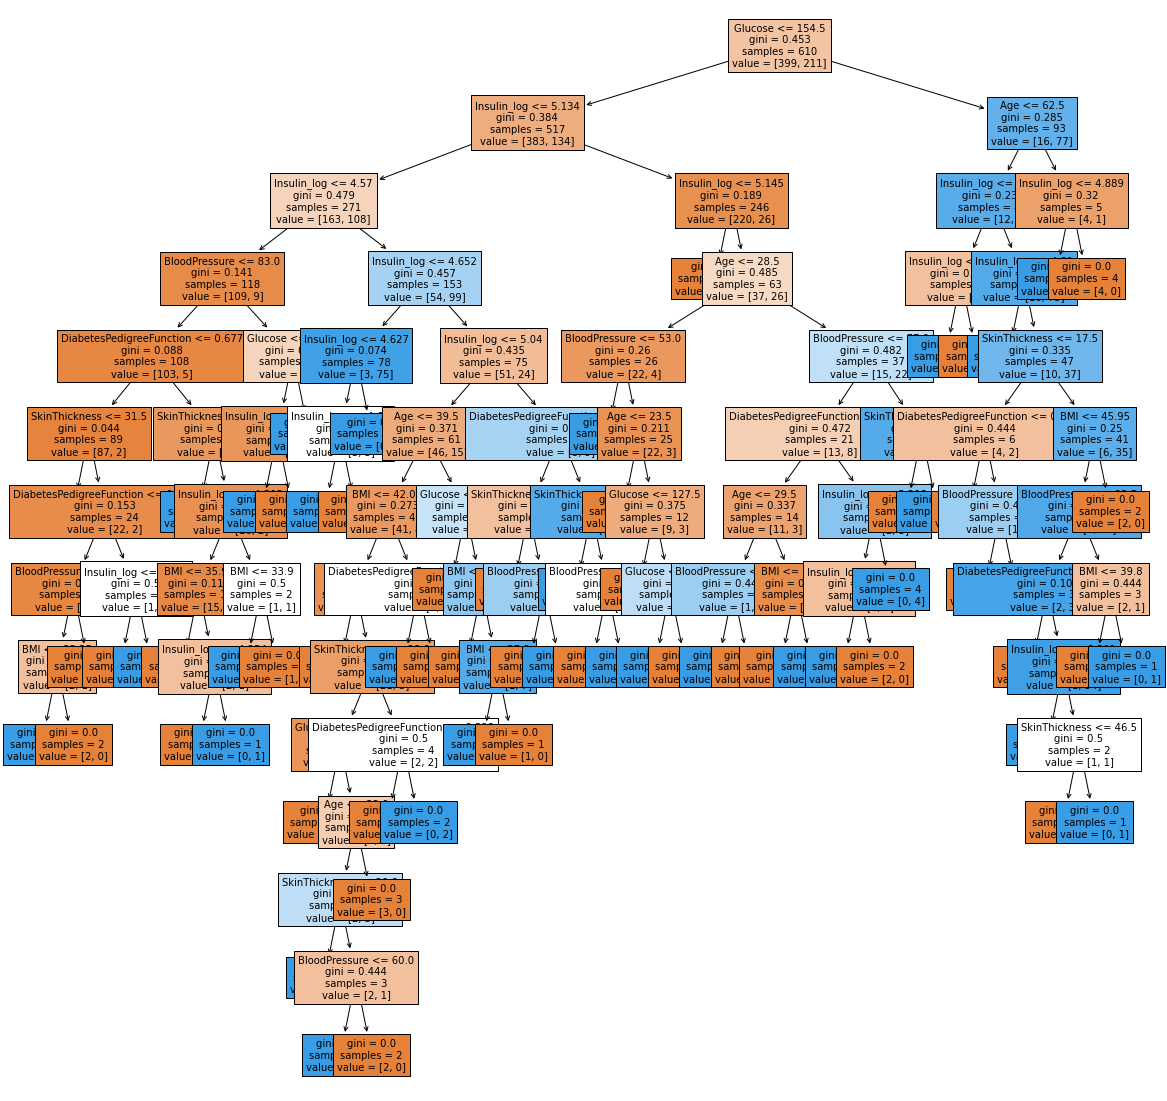

In [155]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [156]:
(y_pred==y_test).mean()
# -> 정확도가 기존 Insulin보다 오름

0.8961038961038961

# -----

<AxesSubplot:xlabel='Insulin'>

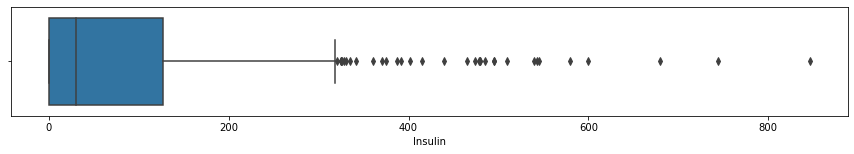

In [157]:
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin'])

<AxesSubplot:xlabel='Insulin_nan'>

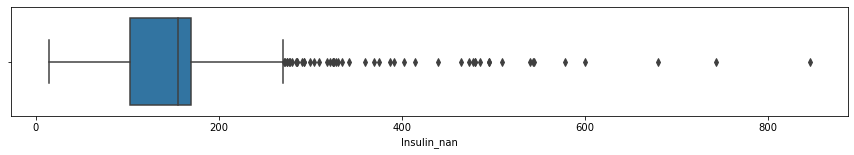

In [158]:
# -> 왜 강의자와 차이가 나지??왜 insulin_nan이 다르지?원래 데이터 차이??
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin_nan'])

In [131]:
df['Insulin_nan'].describe()

count    768.000000
mean     150.303385
std       88.132048
min       14.000000
25%      102.500000
50%      155.000000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [132]:
IQR3=df['Insulin_nan'].quantile(0.75)
IQR1=df['Insulin_nan'].quantile(0.25)

IQR=IQR3-IQR1
IQR

67.0

In [134]:
OUT=IQR3+(IQR*1.5)
OUT
# -> 270.0이 넘는 값은 이상치로 간주

270.0

In [135]:
df[df['Insulin_nan']>OUT].shape

(51, 16)

In [136]:
df[df['Insulin_nan']>600].shape

(3, 16)

In [137]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [141]:
train=df[:split_count].copy()
train.shape

(614, 16)

In [142]:
train[train['Insulin_nan']<600].shape

(610, 16)

In [143]:
train=train[train['Insulin_nan']<600]
train.shape

(610, 16)

In [144]:
test=df[split_count:].copy()
test.shape

(154, 16)

In [159]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_Insulin']

In [160]:
label_name='Outcome'
label_name

'Outcome'

In [161]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(610, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  Age  \
0      148             72             35  33.6                     0.627   50   
1       85             66             29  26.6                     0.351   31   
2      183             64              0  23.3                     0.672   32   
3       89             66             23  28.1                     0.167   21   
4      137             40             35  43.1                     2.288   33   

   Pregnancies_high  Insulin_nan  low_glu_Insulin  
0             False        102.5            False  
1             False        169.5            False  
2              True        102.5            False  
3             False         94.0             True  
4             False        168.0            False

In [162]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [163]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614      138             74             26  36.1                     0.557   
615      106             72              0  25.8                     0.207   
616      117             96              0  28.7                     0.157   
617       68             62             13  20.1                     0.257   
618      112             82             24  28.2                     1.282   

     Age  Pregnancies_high  Insulin_nan  low_glu_Insulin  
614   50              True        144.0            False  
615   27             False        169.5            False  
616   30             False        169.5            False  
617   23             False         15.0             True  
618   50              True        102.5            False

In [164]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [165]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [166]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
y_pred=model.predict(x_test)

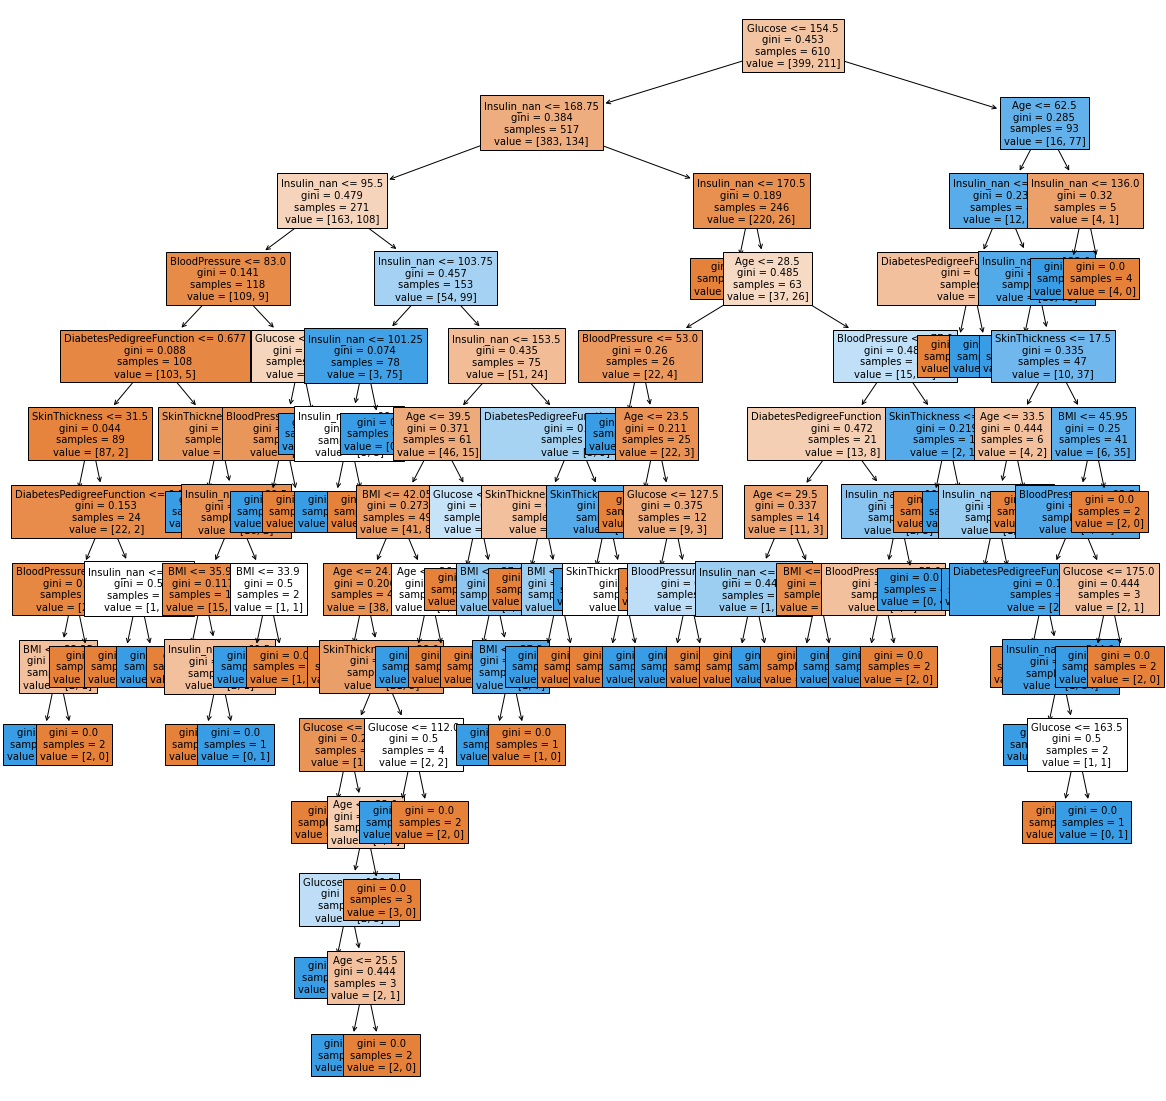

In [168]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [169]:
(y_pred==y_test).mean()
# -> 이전과 비슷한 정확도

0.9025974025974026

# -----

In [174]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df[['Glucose','DiabetesPedigreeFunction']])
scale=scaler.transform(df[['Glucose','DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [175]:
df[['Glucose','DiabetesPedigreeFunction']]=scale
df[['Glucose','DiabetesPedigreeFunction']].head()

Glucose  DiabetesPedigreeFunction
0  0.848324                  0.468492
1 -1.123396                 -0.365061
2  1.943724                  0.604397
3 -0.998208                 -0.920763
4  0.504055                  5.484909

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

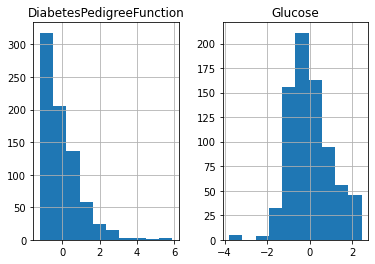

In [176]:
df[['Glucose','DiabetesPedigreeFunction']].hist()

In [177]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [178]:
train=df[:split_count].copy()
train.shape

(614, 16)

In [179]:
train=train[train['Insulin_nan']<600]
train.shape

(610, 16)

In [180]:
test=df[split_count:].copy()
test.shape

(154, 16)

In [181]:
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_Insulin']

In [182]:
label_name='Outcome'
label_name

'Outcome'

In [183]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(610, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
0  0.848324             72             35  33.6                  0.468492   
1 -1.123396             66             29  26.6                 -0.365061   
2  1.943724             64              0  23.3                  0.604397   
3 -0.998208             66             23  28.1                 -0.920763   
4  0.504055             40             35  43.1                  5.484909   

   Age  Pregnancies_high  Insulin_nan  low_glu_Insulin  
0   50             False        102.5            False  
1   31             False        169.5            False  
2   32              True        102.5            False  
3   21             False         94.0             True  
4   33             False        168.0            False

In [184]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [185]:
x_test=test[feature_names]
print(x_test.shape)
x_test.head()

(154, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614  0.535352             74             26  36.1                  0.257084   
615 -0.466156             72              0  25.8                 -0.799958   
616 -0.121888             96              0  28.7                 -0.950964   
617 -1.655448             62             13  20.1                 -0.648952   
618 -0.278373             82             24  28.2                  2.446670   

     Age  Pregnancies_high  Insulin_nan  low_glu_Insulin  
614   50              True        144.0            False  
615   27             False        169.5            False  
616   30             False        169.5            False  
617   23             False         15.0             True  
618   50              True        102.5            False

In [186]:
y_test=test[label_name]
print(y_test.shape)

(154,)


In [187]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [188]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [189]:
y_pred=model.predict(x_test)

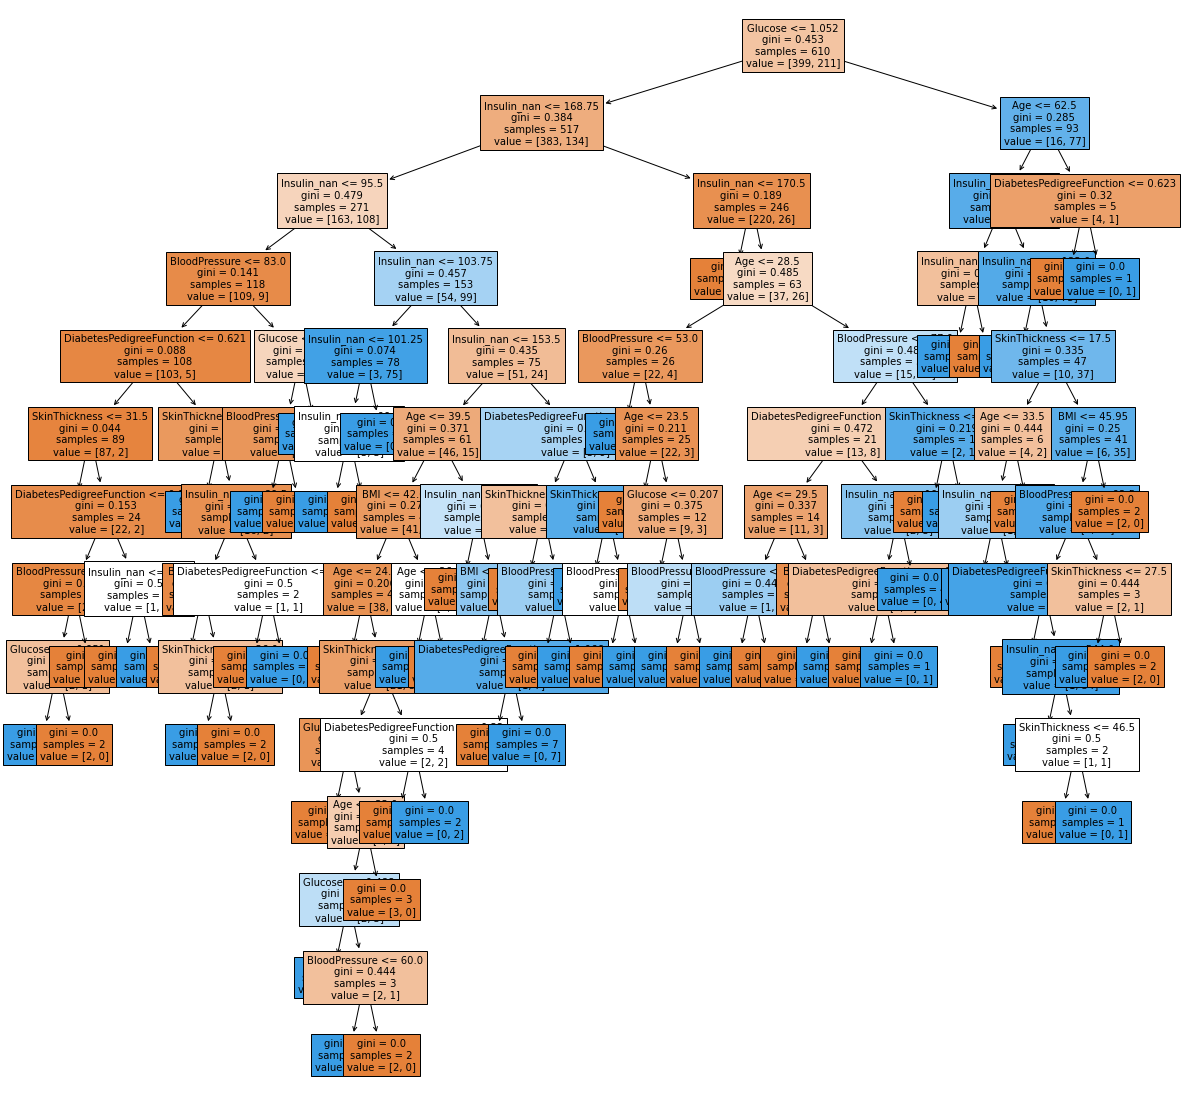

In [190]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [191]:
(y_pred==y_test).mean()
# -> 별차이없는 결과가 나왔지만, scale정도가 더 큰 데이터의 경우에는 유용할 수 있음

0.9155844155844156

# -----

In [ ]:
# 데이터프레임을 csv로 저장하기

In [194]:
df.to_csv("diabetes_feature.csv", index=False)

In [195]:
# 잘 저장되있나 확인
pd.read_csv("./diabetes_feature.csv").head()

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6  0.848324             72             35        0  33.6   
1            1 -1.123396             66             29        0  26.6   
2            8  1.943724             64              0        0  23.3   
3            1 -0.998208             66             23       94  28.1   
4            0  0.504055             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  Age_low  \
0                  0.468492   50        1             False    False   
1                 -0.365061   31        0             False    False   
2                  0.604397   32        1              True    False   
3                 -0.920763   21        0             False     True   
4                  5.484909   33        1             False    False   

   Age_middle  Age_high  Insulin_nan  Insulin_log  low_glu_Insulin  
0        True     False        102.5     4.639572            False  
1        True     False        169.5     5.138735            False  
2        True     False        102.5     4.639572            False  
3       False     False         94.0     4.553877             True  
4        True     False        168.0     5.129899            False